In [1]:
import geopandas as gpd
from shapely.geometry import (
    Point, 
    LineString,
    LinearRing,
    Polygon,
    MultiPoint,
    MultiLineString,
    MultiPolygon,
    box
)

gpd.__version__

'1.0.0'

# 2 geopandas 1.0版本介绍

## 2.1 新增API介绍

### 2.1.1 新增count_geometries()方法

In [2]:
demo_gdf = gpd.GeoDataFrame(
    geometry=[
        Point(0, 0),
        MultiPoint([Point(i, i) for i in range(5)])
    ]
)

demo_gdf.count_geometries()

0    1
1    5
dtype: int32

### 2.1.2 新增count_interior_rings()方法

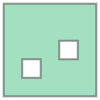

In [3]:
demo_polygon = Polygon(
    [(0, 0), (0, 5), (5, 5), (5, 0)],
    [
        [(1, 1), (1, 2), (2, 2), (2, 1)],
        [(3, 2), (3, 3), (4, 3), (4, 2)],
    ],
)
demo_polygon

In [4]:
demo_gdf = gpd.GeoDataFrame(geometry=[demo_polygon])
demo_gdf.count_interior_rings()

0    2
dtype: int32

### 2.1.3 新增relate_pattern()方法

In [5]:
demo_s1 = gpd.GeoSeries([Polygon([(0, 0), (0, 5), (5, 5), (5, 0)])])
demo_s2 = gpd.GeoSeries([Polygon([(1, 1), (1, 6), (6, 6), (6, 1)])])

# 计算DE-9IM空间关系
demo_s1.relate(demo_s2)

0    212101212
dtype: object

In [6]:
# 使用relate_pattern()判断指定的DE-9IM空间关系
demo_s1.relate_pattern(demo_s2, pattern='212101212')

0    True
dtype: bool

### 2.1.4 新增intersection_all()方法

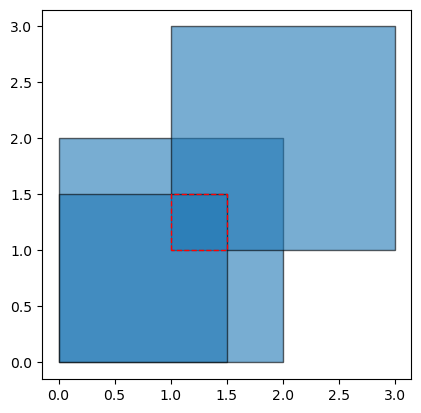

In [7]:
demo_s = gpd.GeoSeries(
    [box(0, 0, 2, 2), box(1, 1, 3, 3), box(0, 0, 1.5, 1.5)]
)
ax = demo_s.plot(edgecolor='black', alpha=0.6)
(
    gpd
    .GeoSeries([demo_s.intersection_all()])
    .plot(ax=ax, facecolor='none', edgecolor='red', linestyle='--')
);

### 2.1.5 新增line_merge()方法

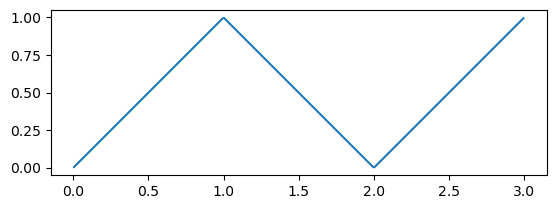

In [8]:
demo_s = gpd.GeoSeries(
    [
        MultiLineString(
            [
                LineString([(0, 0), (1, 1)]),
                LineString([(1, 1), (2, 0)]),
                LineString([(2, 0), (3, 1)])
            ]
        ),
    ]
)
demo_s.plot();

In [9]:
demo_s.line_merge()

0    LINESTRING (0 0, 1 1, 2 0, 3 1)
dtype: geometry

### 2.1.6 新增set_precision()、get_precision()方法

In [10]:
demo_s = gpd.GeoSeries([Point(0.123456, 0.123456)])
demo_s.set_precision(0.0001)

0    POINT (0.1235 0.1235)
dtype: geometry

In [11]:
demo_s.get_precision()

0    0.0
dtype: float64

In [12]:
demo_s.set_precision(0.0001).get_precision()

0    0.0001
dtype: float64

### 2.1.7 新增count_coordinates()方法

In [13]:
demo_s = gpd.GeoSeries(
    [
        MultiPoint([Point(j, j) for j in range(i)])
        for i in range(1, 6)
    ]
)
demo_s.count_coordinates()

0    1
1    2
2    3
3    4
4    5
dtype: int32

### 2.1.8 新增is_ccw属性方法

In [14]:
demo_s = gpd.GeoSeries(
    [
        LinearRing([(0, 0), (0, 1), (1, 1), (0, 0)]),
        LinearRing([(0, 0), (1, 1), (0, 1), (0, 0)]),
        LineString([(0, 0), (1, 1), (0, 1)]),
        Point(3, 3)
    ]
)
demo_s.is_ccw

0    False
1     True
2    False
3    False
dtype: bool

### 2.1.9 新增is_closed属性方法

In [15]:
demo_s = gpd.GeoSeries(
    [
        LineString([(0, 0), (1, 1), (0, 1), (0, 0)]),
        LineString([(0, 0), (1, 1), (0, 1)]),
        Polygon([(0, 0), (0, 1), (1, 1), (0, 0)]),
        Point(3, 3)
    ]
)
demo_s.is_closed

0     True
1    False
2    False
3    False
dtype: bool

### 2.1.10 新增force_2d()、force_3d()方法

In [16]:
demo_s = gpd.GeoSeries([Point(0, 0, 0)])
demo_s

0    POINT Z (0 0 0)
dtype: geometry

In [17]:
demo_s.force_2d()

0    POINT (0 0)
dtype: geometry

In [18]:
demo_s.force_2d().force_3d()

0    POINT Z (0 0 0)
dtype: geometry

### 2.1.11 新增voronoi_polygons()方法

<Axes: >

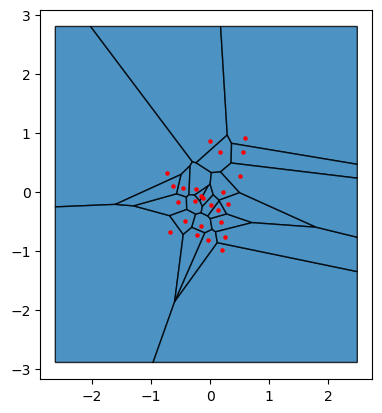

In [19]:
import numpy as np

demo_s = gpd.GeoSeries(
    [
        Point(np.random.uniform(-1, 1), np.random.uniform(-1, 1)) 
        for i in range(25)
    ]
)
ax = demo_s.plot(color='red', zorder=1, markersize=5)
(
    demo_s
    .voronoi_polygons()
    .plot(ax=ax, edgecolor='black', zorder=0, alpha=0.8)
)

### 2.1.12 新增contains_properly()方法

In [20]:
demo_s1 = gpd.GeoSeries(
    [
        Polygon([(0, 0), (1, 0), (1, 1), (0, 1)]),
        Polygon([(0, 0), (2, 0), (2, 2), (0, 2)])
    ]
)

demo_s2 = gpd.GeoSeries(
    [
        Polygon([(0.5, 0.5), (1, 0.5), (1, 1), (0.5, 1)]),
        Polygon([(0.5, 0.5), (1, 0.5), (1, 1), (0.5, 1)]),
    ]
)

In [21]:
demo_s1.contains_properly(demo_s2)

0    False
1     True
dtype: bool

In [22]:
demo_s1.contains(demo_s2)

0    True
1    True
dtype: bool

### 2.1.13 新增build_area()方法

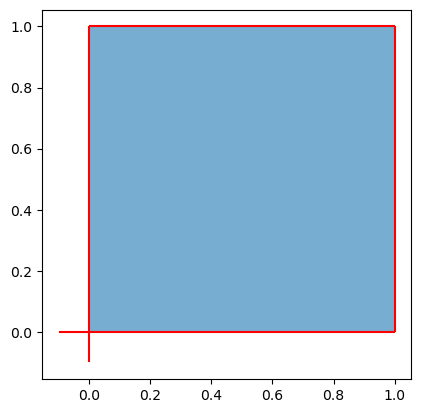

In [23]:
demo_s = gpd.GeoSeries(
    [
        LineString([(-0.1, 0), (1, 0)]),
        LineString([(1, 0), (1, 1)]),
        LineString([(1, 1), (0, 1)]),
        LineString([(0, 1), (0, -0.1)]),
    ]
)
ax = demo_s.plot(color='red')
demo_s.build_area().plot(ax=ax, alpha=0.6);

### 2.1.14 新增snap()方法

<Axes: >

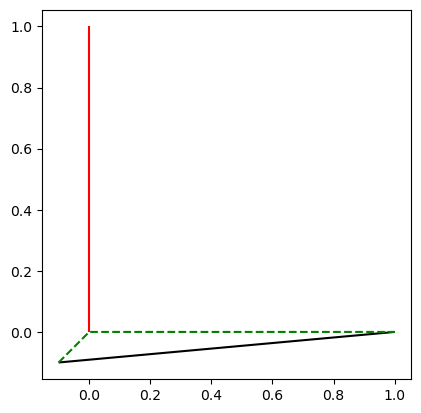

In [24]:
demo_s1 = gpd.GeoSeries(
    [
        LineString([(-0.1, -0.1), (1, 0)])
    ]
)
demo_s2 = gpd.GeoSeries(
    [
        LineString([(0, 1), (0, 0)])
    ]
)
# 调整前
ax = demo_s1.plot(color='black')
demo_s2.plot(ax=ax, color='red')
# 调整后
demo_s1.snap(demo_s2, tolerance=0.1).plot(ax=ax, color='green', linestyle='--')

### 2.1.15 新增transform()方法

In [25]:
demo_s = gpd.GeoSeries(
    [
        Point(1, 1),
        LineString([(0, 0), (1, 1)]),
        Polygon([(0, 0), (1, 1), (0, 1)]),
    ]
)
demo_s.transform(
    lambda c_array: np.apply_along_axis(lambda c: [c[0] + 1, c[1] + 0.5], 1, c_array)
)

0                             POINT (2 1.5)
1                 LINESTRING (1 0.5, 2 1.5)
2    POLYGON ((1 0.5, 2 1.5, 1 1.5, 1 0.5))
dtype: geometry

### 2.1.16 新增get_geometry()方法

In [26]:
demo_s = gpd.GeoSeries(
    [
        Point(0, 0),
        MultiPoint([Point(i, i) for i in range(4)])
    ]
)
demo_s

0                                POINT (0 0)
1    MULTIPOINT ((0 0), (1 1), (2 2), (3 3))
dtype: geometry

In [27]:
demo_s.get_geometry(0)

0    POINT (0 0)
1    POINT (0 0)
dtype: geometry

In [28]:
demo_s.get_geometry(1)

0           None
1    POINT (1 1)
dtype: geometry

In [29]:
demo_s.get_geometry(-1)

0    POINT (0 0)
1    POINT (3 3)
dtype: geometry

### 2.1.17 新增dwithin()方法

<Axes: >

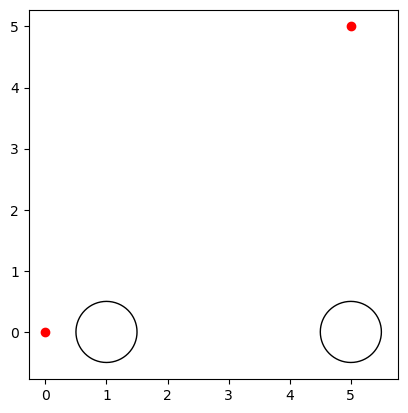

In [30]:
demo_s1 = gpd.GeoSeries(
    [
        Point(0, 0),
        Point(5, 5)
    ]
)

demo_s2 = gpd.GeoSeries([Point(1, 0), Point(5, 0)]).buffer(0.5)
ax = demo_s1.plot(color='red')
demo_s2.plot(ax=ax, facecolor='none', edgecolor='black')

In [31]:
demo_s1.dwithin(demo_s2, 1)

0     True
1    False
dtype: bool

### 2.1.18 新增to_geo_dict()方法

In [32]:
demo_gdf = gpd.GeoDataFrame(
    {
        'value': range(3),
        'geometry': [
            Point(0, 0),
            LineString([(0, 0), (1, 1)]),
            Polygon([(0, 0), (1, 1), (0, 1)]),
        ]
    }
)
demo_gdf

,value,geometry
0,0,POINT (0 0)
1,1,"LINESTRING (0 0, 1 1)"
2,2,"POLYGON ((0 0, 1 1, 0 1, 0 0))"


In [33]:
demo_gdf.to_geo_dict()

{'type': 'FeatureCollection',
 'features': [{'id': '0',
   'type': 'Feature',
   'properties': {'value': 0},
   'geometry': {'type': 'Point', 'coordinates': (0.0, 0.0)}},
  {'id': '1',
   'type': 'Feature',
   'properties': {'value': 1},
   'geometry': {'type': 'LineString',
    'coordinates': ((0.0, 0.0), (1.0, 1.0))}},
  {'id': '2',
   'type': 'Feature',
   'properties': {'value': 2},
   'geometry': {'type': 'Polygon',
    'coordinates': (((0.0, 0.0), (1.0, 1.0), (0.0, 1.0), (0.0, 0.0)),)}}]}

## 2.2 功能增强

### 2.2.1 空间连接新增dwithin型空间关系判断

In [34]:
demo_gdf1 = gpd.GeoDataFrame(
    {
        'name': [f'点要素A{i}' for i in range(3)],
        'geometry': [Point(0, 0), Point(1, 0), Point(2, 0)]
    }
)

demo_gdf2 = gpd.GeoDataFrame(
    {
        'name': [f'点要素B{i}' for i in range(3)],
        'geometry': [Point(0, 0.5), Point(1, 1), Point(2, 1.5)]
    }
)

(
    demo_gdf1
    .sjoin(demo_gdf2, predicate='dwithin', distance=1)
)

,name_left,geometry,index_right,name_right
0,点要素A0,POINT (0 0),0,点要素B0
1,点要素A1,POINT (1 0),1,点要素B1


### 2.2.2 配合pd.read_csv指定矢量列类型

In [35]:
import pandas as pd

(
    gpd
    .GeoDataFrame(
        {
            'name': [f'点要素A{i}' for i in range(3)],
            'geometry': [Point(0, 0), Point(1, 0), Point(2, 0)]
        }
    )
    .to_csv('矢量写出测试.csv', index=False)
)

In [36]:
pd.read_csv('矢量写出测试.csv').dtypes

name        object
geometry    object
dtype: object

In [37]:
pd.read_csv('矢量写出测试.csv', dtype={'geometry': 'geometry'}).dtypes

name          object
geometry    geometry
dtype: object

### 2.2.3 to_json()新增参数show_bbox、drop_id、to_wgs84

In [38]:
demo_gdf = gpd.GeoDataFrame(
    {
        'name': ['示例要素'],
        'geometry': [Point(106, 29)]
    },
    crs='EPSG:4524'
)
print(demo_gdf.to_json(
    ensure_ascii=False,
    indent=4,
    show_bbox=True,
    drop_id=True,
    to_wgs84=False
))

{
    "type": "FeatureCollection",
    "features": [
        {
            "type": "Feature",
            "properties": {
                "name": "示例要素"
            },
            "geometry": {
                "type": "Point",
                "coordinates": [
                    106.0,
                    29.0
                ]
            },
            "bbox": [
                106.0,
                29.0,
                106.0,
                29.0
            ]
        }
    ],
    "bbox": [
        106.0,
        29.0,
        106.0,
        29.0
    ],
    "crs": {
        "type": "name",
        "properties": {
            "name": "urn:ogc:def:crs:EPSG::4524"
        }
    }
}


### 2.2.4 空间连接新增参数on_attribute

In [39]:
demo_gdf1 = gpd.GeoDataFrame(
    {
        'name': [f'点要素A{i}' for i in range(3)],
        'group': ['x', 'y', 'z'],
        'geometry': [Point(0, 0), Point(1, 0), Point(2, 0)]
    }
)

demo_gdf2 = gpd.GeoDataFrame(
    {
        'name': [f'点要素B{i}' for i in range(3)],
        'group': ['y', 'y', 'z'],
        'geometry': [Point(0, 0.5), Point(1, 1), Point(2, 1.5)]
    }
)

(
    demo_gdf1
    .sjoin(demo_gdf2, predicate='dwithin', distance=1, on_attribute='group')
)

,name_left,group,geometry,index_right,name_right
1,点要素A1,y,POINT (1 0),1,点要素B1


## 2.3 标记为废弃的API

- `unary_union`将废弃，更换为`union_all()`

In [40]:
demo_s = gpd.GeoSeries([Point(i, i) for i in range(5)])

C:\Users\CNFeffery\AppData\Local\Temp\ipykernel_151120\1218097510.py:1: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  demo_s.unary_union


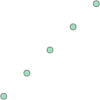

In [41]:
demo_s.unary_union

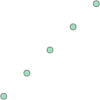

In [42]:
demo_s.union_all()

- `use_pygeos`将废弃并在`1.1`版本中正式移除

In [43]:
gpd.options.use_pygeos = True

C:\Users\CNFeffery\AppData\Local\Temp\ipykernel_151120\2305642257.py:1: UserWarning: pygeos support was removed in 1.0. geopandas.use_pygeos is a no-op and will be removed in geopandas 1.1.
  gpd.options.use_pygeos = True


- `crs`属性赋值以修改坐标系的方式将在未来被禁用，请统一使用`set_crs()`代替

In [44]:
demo_gdf = gpd.GeoDataFrame(geometry=[Point(0, 0)], crs='EPSG:4326')

In [45]:
# 不推荐的方式
demo_gdf.crs = 'EPSG:4524'

In [46]:
# 推荐的方式
demo_gdf.set_crs('EPSG:4524', inplace=True);